## Librerías

In [1]:
import pandas as pd
import os
from matplotlib import pyplot
from pandas_profiling import ProfileReport
import numpy as np
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal      #PERIODOGRAMA

In [2]:
os.chdir('/Users/TELENSA/Documents/GitHub/timeseries_lab/data/')

Lectura del fichero

In [3]:
df = pd.read_csv('Madrid_polution_dataframe.csv', sep = ',')

#### ____

Modificaciones del fichero

In [4]:
df['DAY'] = df['DAY'].astype(str)
df['MONTH'] = df['MONTH'].astype(str)
df['YEAR'] = df['YEAR'].astype(str)
df['HOUR'] = df['HOUR'].astype(str)
df['SEASON'] = df['SEASON'].astype(str)

In [5]:
df['len_day'] = df['DAY'].str.len()
df['len_month'] = df['MONTH'].str.len()

df['DAY'] = np.where(df['len_day'] == 1,'0' + df['DAY'], df['DAY'])
df['MONTH'] = np.where(df['len_month'] == 1,'0' + df['MONTH'], df['MONTH'])

df['date'] = df['DAY'] + '/' + df['MONTH'] + '/' + df['YEAR']
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='ignore')

In [6]:
df_agr = df.copy()
df_agr = df_agr.groupby(by='date',as_index=False).mean()
df_agr = df_agr[['date','PM_RETIRO','PM_VALLECAS','PM_CIUDADLINEAL','PM_CENTRO','TEMPERATURE']]

In [ ]:
#df_agr

#### ____

## Análisis descriptivo

In [7]:
df.isna().sum()

YEAR                             0
MONTH                            0
DAY                              0
HOUR                             0
SEASON                           0
PM_RETIRO                    27532
PM_VALLECAS                  32076
PM_CIUDADLINEAL              27653
PM_CENTRO                     2197
DEW_POINT                        5
HUMIDITY                       339
PREASSURE                      339
TEMPERATURE                      5
WIND_DIRECTION                   5
WIND_SPEED                       5
PRECIPITAITON                  484
COMMULATIVE_PRECIPITATION      484
len_day                          0
len_month                        0
date                             0
dtype: int64

Aunque sigamos adelante en este momento, habrá cálculos que nos salgan mal o no salga nada, puesto que en algunas de las series temporales hay nulos.

Acordar que tipo de método utilizamos para, bien reemplazar los datos o acortar el tiempo en las series temporales que tienen los nulos.

Esto lo tengo que ver en el siguiente laboratorio.

In [8]:
df_agr.dtypes

date               datetime64[ns]
PM_RETIRO                 float64
PM_VALLECAS               float64
PM_CIUDADLINEAL           float64
PM_CENTRO                 float64
TEMPERATURE               float64
dtype: object

In [9]:
df_agr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM_RETIRO,1076.0,89.440227,74.483680,3.000000,35.900568,67.562500,120.854620,564.708333
PM_VALLECAS,941.0,92.348632,75.485227,4.733333,40.625000,73.458333,120.434783,593.000000
PM_CIUDADLINEAL,1073.0,88.920306,75.524644,3.842105,35.380952,65.954545,118.041667,510.043478
PM_CENTRO,2155.0,95.908439,77.682311,3.181818,39.755952,74.916667,125.863782,568.565217
TEMPERATURE,2191.0,17.891180,9.385066,-4.277322,8.888661,19.083333,26.631148,34.520492


### Visualización de las series temporales

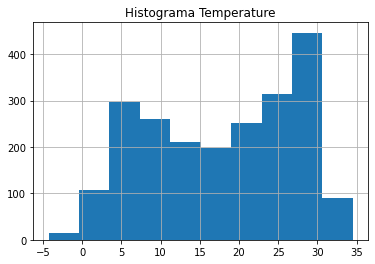

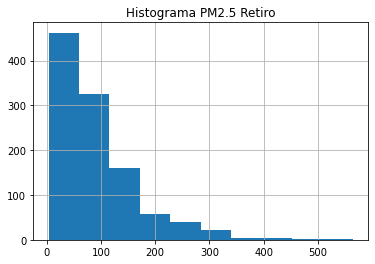

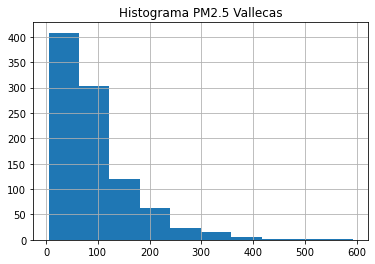

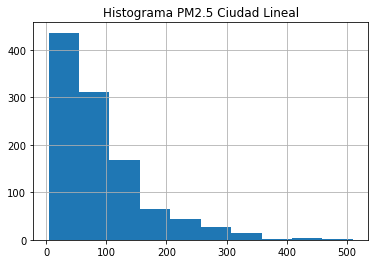

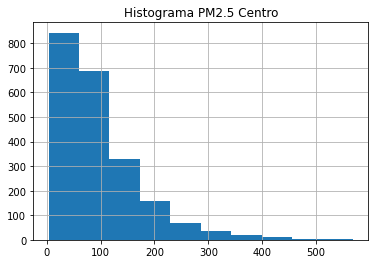

In [10]:
pyplot.title('Histograma Temperature')
df_agr['TEMPERATURE'].hist()
pyplot.show()

pyplot.title('Histograma PM2.5 Retiro')
df_agr['PM_RETIRO'].hist()
pyplot.show()

pyplot.title('Histograma PM2.5 Vallecas')
df_agr['PM_VALLECAS'].hist()
pyplot.show()

pyplot.title('Histograma PM2.5 Ciudad Lineal')
df_agr['PM_CIUDADLINEAL'].hist()
pyplot.show()

pyplot.title('Histograma PM2.5 Centro')
df_agr['PM_CENTRO'].hist()
pyplot.show()

#### ____

Ahora visualizamos toda la serie temporal que tenemos

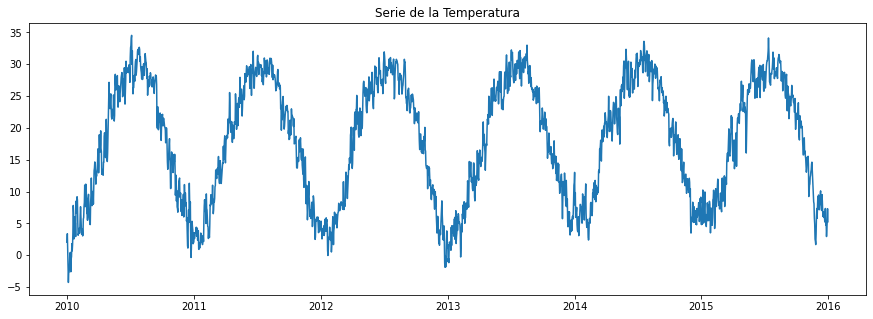

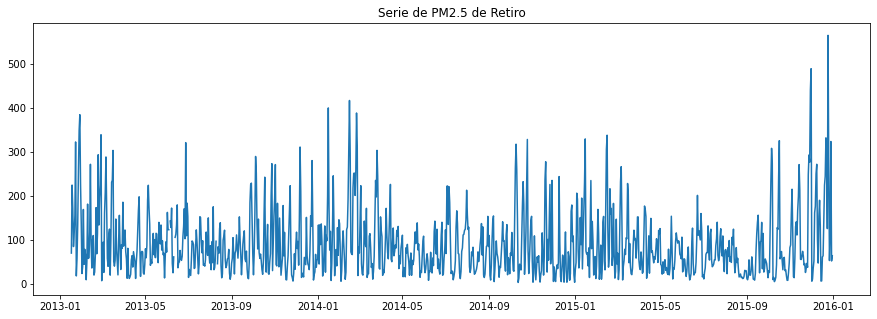

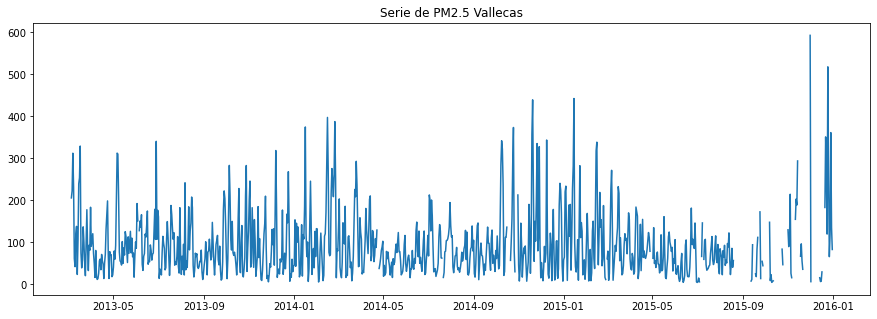

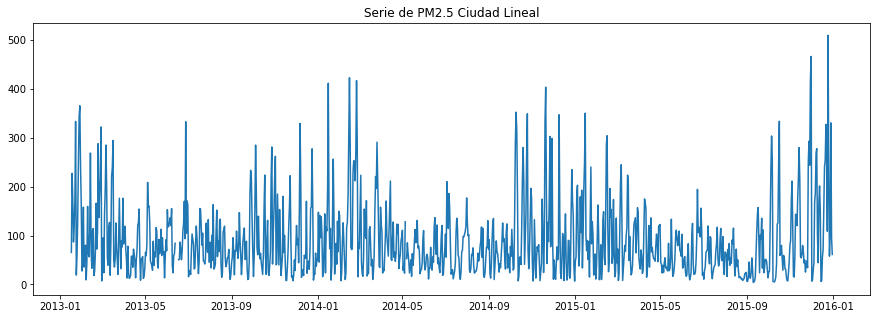

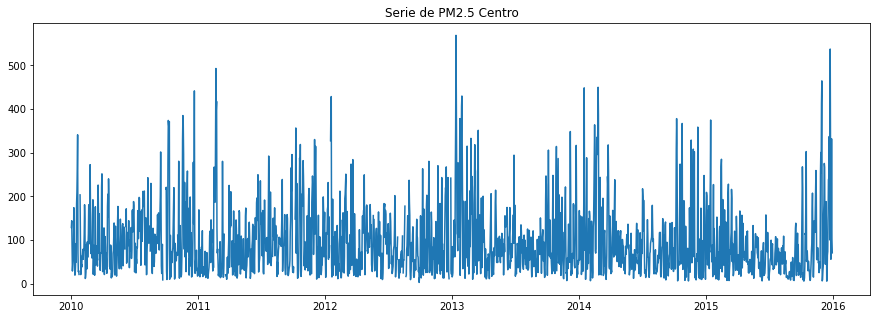

In [11]:
pyplot.figure(figsize=(15,5))
pyplot.title("Serie de la Temperatura")
pyplot.plot(df_agr.date,df_agr.TEMPERATURE)
pyplot.show()

pyplot.figure(figsize=(15,5))
pyplot.title("Serie de PM2.5 de Retiro")
pyplot.plot(df_agr.date,df_agr.PM_RETIRO)
pyplot.show()

pyplot.figure(figsize=(15,5))
pyplot.title("Serie de PM2.5 Vallecas")
pyplot.plot(df_agr.date,df_agr.PM_VALLECAS)
pyplot.show()

pyplot.figure(figsize=(15,5))
pyplot.title("Serie de PM2.5 Ciudad Lineal")
pyplot.plot(df_agr.date,df_agr.PM_CIUDADLINEAL)
pyplot.show()

pyplot.figure(figsize=(15,5))
pyplot.title("Serie de PM2.5 Centro")
pyplot.plot(df_agr.date,df_agr.PM_CENTRO)
pyplot.show()

#### ____

A continuación se plotean boxplot por año, año/mes y día de la semana para ver la volatilidad histórica.

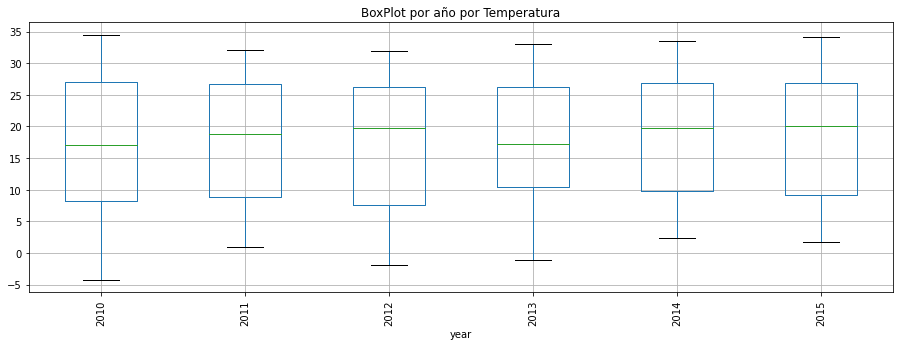

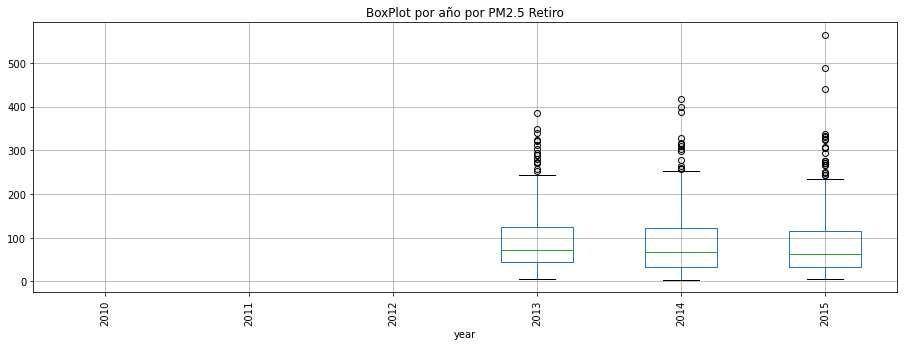

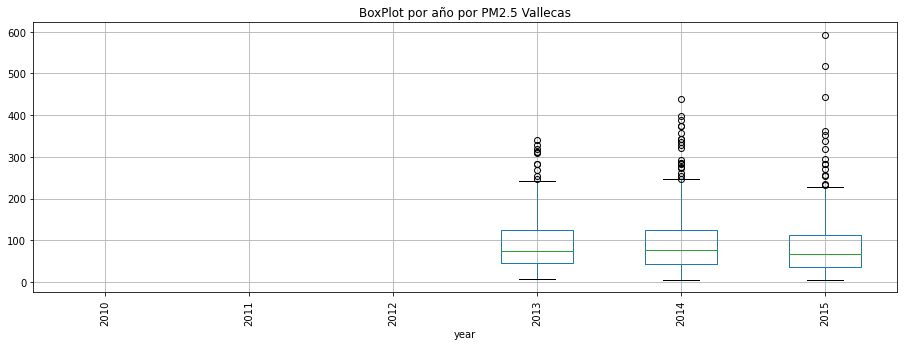

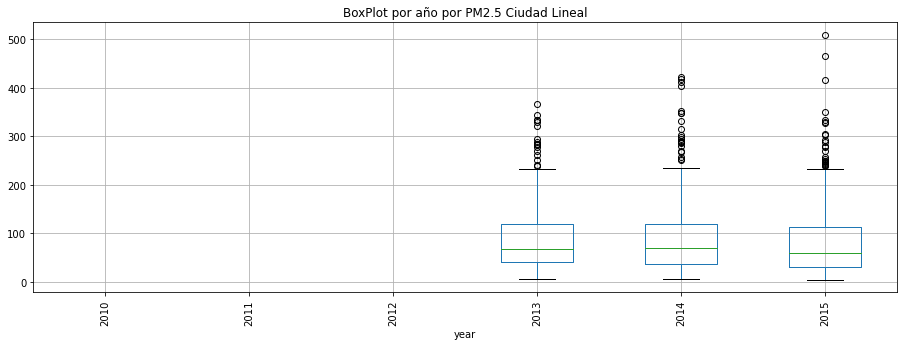

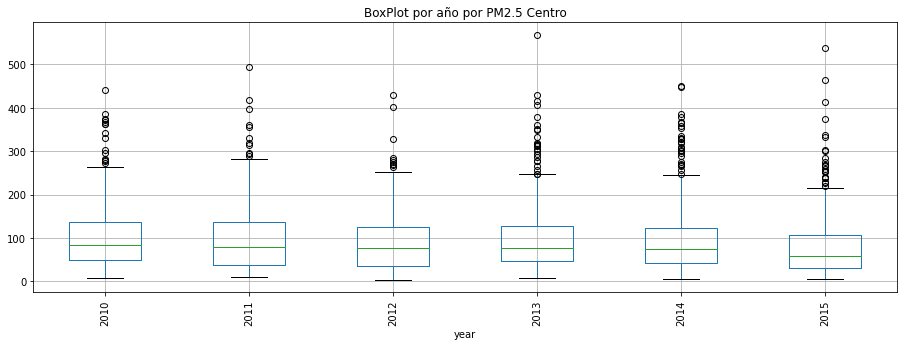

In [12]:
df_agr['year'] = df_agr.date.dt.year
df_agr['month'] = df_agr.date.dt.month
df_agr.boxplot(by='year', column='TEMPERATURE',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año por Temperatura")
pyplot.suptitle('')
pyplot.show()

df_agr['year'] = df_agr.date.dt.year
df_agr['month'] = df_agr.date.dt.month
df_agr.boxplot(by='year', column='PM_RETIRO',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año por PM2.5 Retiro")
pyplot.suptitle('')
pyplot.show()

df_agr['year'] = df_agr.date.dt.year
df_agr['month'] = df_agr.date.dt.month
df_agr.boxplot(by='year', column='PM_VALLECAS',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año por PM2.5 Vallecas")
pyplot.suptitle('')
pyplot.show()

df_agr['year'] = df_agr.date.dt.year
df_agr['month'] = df_agr.date.dt.month
df_agr.boxplot(by='year', column='PM_CIUDADLINEAL',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año por PM2.5 Ciudad Lineal")
pyplot.suptitle('')
pyplot.show()

df_agr['year'] = df_agr.date.dt.year
df_agr['month'] = df_agr.date.dt.month
df_agr.boxplot(by='year', column='PM_CENTRO',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año por PM2.5 Centro")
pyplot.suptitle('')
pyplot.show()

#### ____

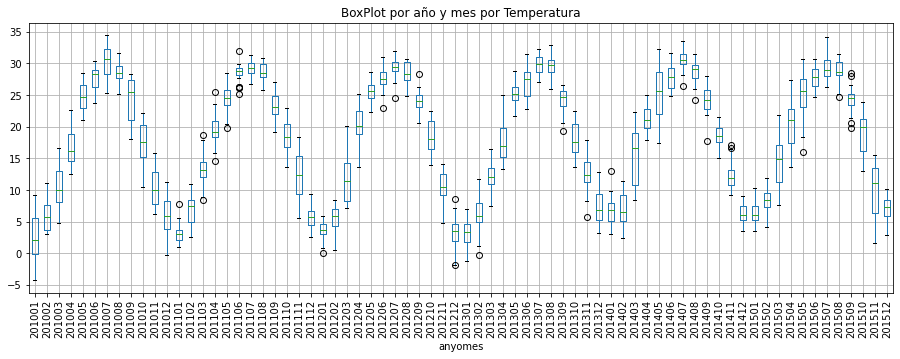

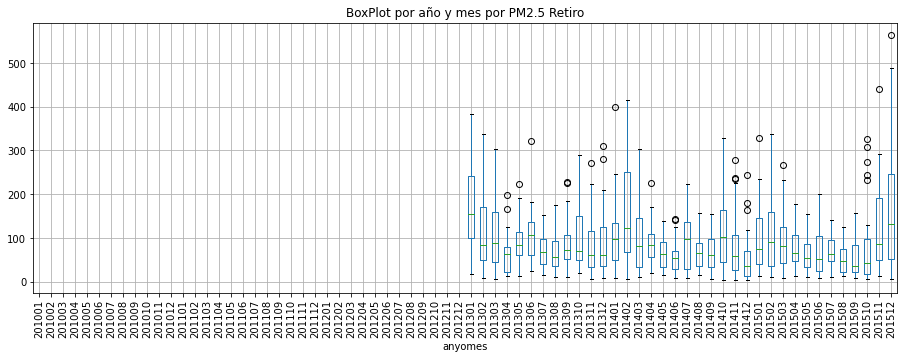

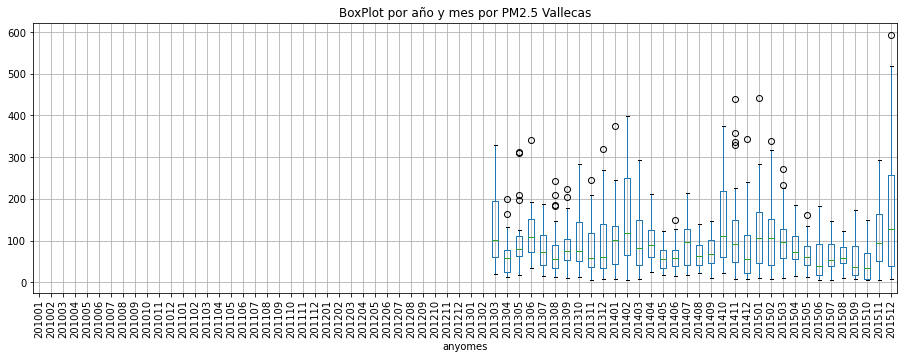

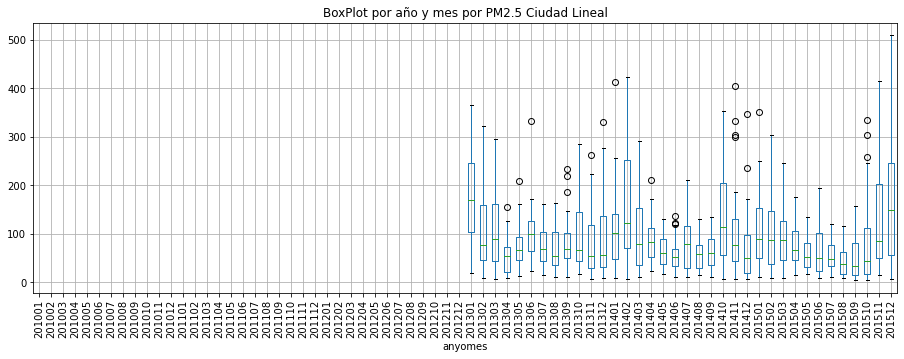

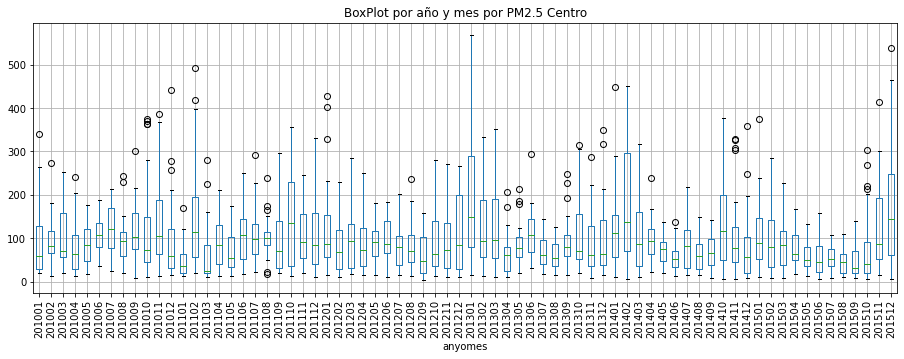

In [13]:
df_agr['anyomes'] = np.where(df_agr['date'].dt.month < 10,
                               df_agr['date'].dt.year.apply(str) + '0' + df_agr['date'].dt.month.apply(str),
                               df_agr['date'].dt.year.apply(str) + df_agr['date'].dt.month.apply(str))
df_agr[df_agr.date.dt.year >= 2010].boxplot(by='anyomes', column='TEMPERATURE',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año y mes por Temperatura")
pyplot.suptitle('')
pyplot.show()

df_agr['anyomes'] = np.where(df_agr['date'].dt.month < 10,
                               df_agr['date'].dt.year.apply(str) + '0' + df_agr['date'].dt.month.apply(str),
                               df_agr['date'].dt.year.apply(str) + df_agr['date'].dt.month.apply(str))
df_agr[df_agr.date.dt.year >= 2010].boxplot(by='anyomes', column='PM_RETIRO',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año y mes por PM2.5 Retiro")
pyplot.suptitle('')
pyplot.show()

df_agr['anyomes'] = np.where(df_agr['date'].dt.month < 10,
                               df_agr['date'].dt.year.apply(str) + '0' + df_agr['date'].dt.month.apply(str),
                               df_agr['date'].dt.year.apply(str) + df_agr['date'].dt.month.apply(str))
df_agr[df_agr.date.dt.year >= 2010].boxplot(by='anyomes', column='PM_VALLECAS',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año y mes por PM2.5 Vallecas")
pyplot.suptitle('')
pyplot.show()

df_agr['anyomes'] = np.where(df_agr['date'].dt.month < 10,
                               df_agr['date'].dt.year.apply(str) + '0' + df_agr['date'].dt.month.apply(str),
                               df_agr['date'].dt.year.apply(str) + df_agr['date'].dt.month.apply(str))
df_agr[df_agr.date.dt.year >= 2010].boxplot(by='anyomes', column='PM_CIUDADLINEAL',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año y mes por PM2.5 Ciudad Lineal")
pyplot.suptitle('')
pyplot.show()

df_agr['anyomes'] = np.where(df_agr['date'].dt.month < 10,
                               df_agr['date'].dt.year.apply(str) + '0' + df_agr['date'].dt.month.apply(str),
                               df_agr['date'].dt.year.apply(str) + df_agr['date'].dt.month.apply(str))
df_agr[df_agr.date.dt.year >= 2010].boxplot(by='anyomes', column='PM_CENTRO',rot=90,figsize=(15,5))
pyplot.title("BoxPlot por año y mes por PM2.5 Centro")
pyplot.suptitle('')
pyplot.show()

#### ____

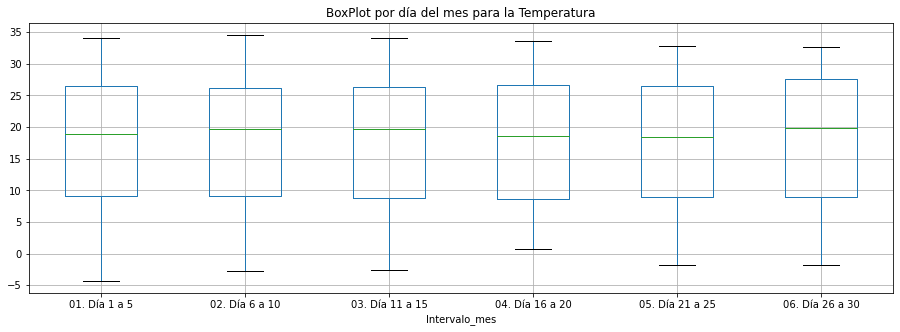

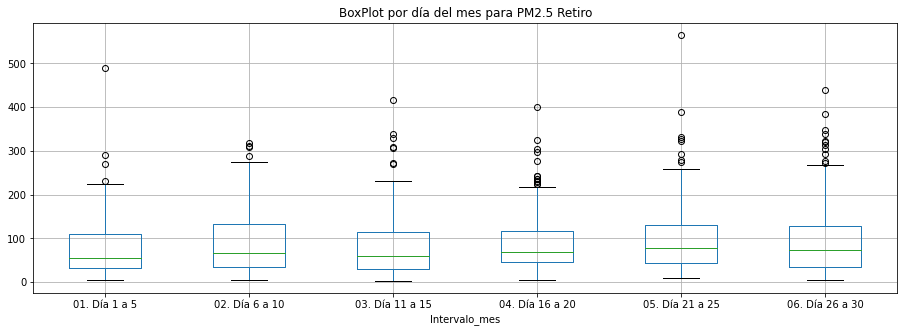

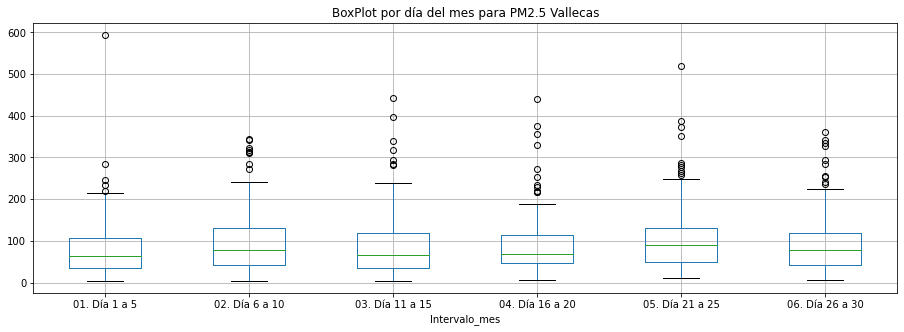

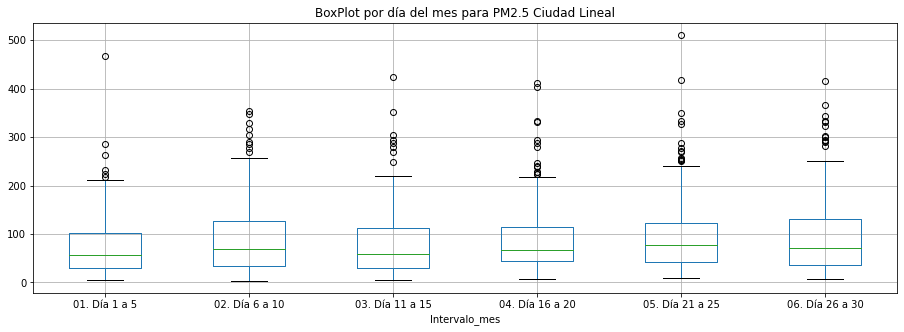

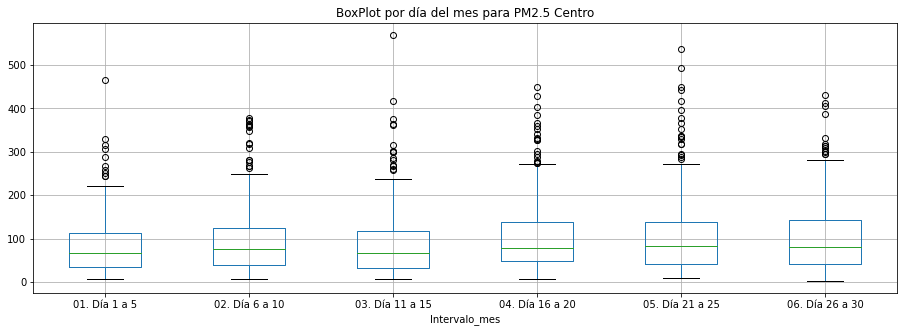

In [14]:
df_agr['Intervalo_mes'] = np.select([df_agr.date.dt.day <=5
                                    ,df_agr.date.dt.day <=10
                                    ,df_agr.date.dt.day <=15
                                    ,df_agr.date.dt.day <=20
                                    ,df_agr.date.dt.day <=25],
                                    ['01. Día 1 a 5','02. Día 6 a 10','03. Día 11 a 15'
                                     ,'04. Día 16 a 20','05. Día 21 a 25'], default='06. Día 26 a 30')
df_agr[df_agr.date <= pd.to_datetime("2019-05-31")].boxplot(by='Intervalo_mes', column='TEMPERATURE',rot=0,
                                                            figsize=(15,5))
pyplot.title("BoxPlot por día del mes para la Temperatura")
pyplot.suptitle('')
pyplot.show()


df_agr['Intervalo_mes'] = np.select([df_agr.date.dt.day <=5
                                    ,df_agr.date.dt.day <=10
                                    ,df_agr.date.dt.day <=15
                                    ,df_agr.date.dt.day <=20
                                    ,df_agr.date.dt.day <=25],
                                    ['01. Día 1 a 5','02. Día 6 a 10','03. Día 11 a 15'
                                     ,'04. Día 16 a 20','05. Día 21 a 25'], default='06. Día 26 a 30')
df_agr[df_agr.date <= pd.to_datetime("2019-05-31")].boxplot(by='Intervalo_mes', column='PM_RETIRO',rot=0,
                                                            figsize=(15,5))
pyplot.title("BoxPlot por día del mes para PM2.5 Retiro")
pyplot.suptitle('')
pyplot.show()


df_agr['Intervalo_mes'] = np.select([df_agr.date.dt.day <=5
                                    ,df_agr.date.dt.day <=10
                                    ,df_agr.date.dt.day <=15
                                    ,df_agr.date.dt.day <=20
                                    ,df_agr.date.dt.day <=25],
                                    ['01. Día 1 a 5','02. Día 6 a 10','03. Día 11 a 15'
                                     ,'04. Día 16 a 20','05. Día 21 a 25'], default='06. Día 26 a 30')
df_agr[df_agr.date <= pd.to_datetime("2019-05-31")].boxplot(by='Intervalo_mes', column='PM_VALLECAS',rot=0,
                                                            figsize=(15,5))
pyplot.title("BoxPlot por día del mes para PM2.5 Vallecas")
pyplot.suptitle('')
pyplot.show()


df_agr['Intervalo_mes'] = np.select([df_agr.date.dt.day <=5
                                    ,df_agr.date.dt.day <=10
                                    ,df_agr.date.dt.day <=15
                                    ,df_agr.date.dt.day <=20
                                    ,df_agr.date.dt.day <=25],
                                    ['01. Día 1 a 5','02. Día 6 a 10','03. Día 11 a 15'
                                     ,'04. Día 16 a 20','05. Día 21 a 25'], default='06. Día 26 a 30')
df_agr[df_agr.date <= pd.to_datetime("2019-05-31")].boxplot(by='Intervalo_mes', column='PM_CIUDADLINEAL',rot=0,
                                                            figsize=(15,5))
pyplot.title("BoxPlot por día del mes para PM2.5 Ciudad Lineal")
pyplot.suptitle('')
pyplot.show()


df_agr['Intervalo_mes'] = np.select([df_agr.date.dt.day <=5
                                    ,df_agr.date.dt.day <=10
                                    ,df_agr.date.dt.day <=15
                                    ,df_agr.date.dt.day <=20
                                    ,df_agr.date.dt.day <=25],
                                    ['01. Día 1 a 5','02. Día 6 a 10','03. Día 11 a 15'
                                     ,'04. Día 16 a 20','05. Día 21 a 25'], default='06. Día 26 a 30')
df_agr[df_agr.date <= pd.to_datetime("2019-05-31")].boxplot(by='Intervalo_mes', column='PM_CENTRO',rot=0,
                                                            figsize=(15,5))
pyplot.title("BoxPlot por día del mes para PM2.5 Centro")
pyplot.suptitle('')
pyplot.show()


#### ____

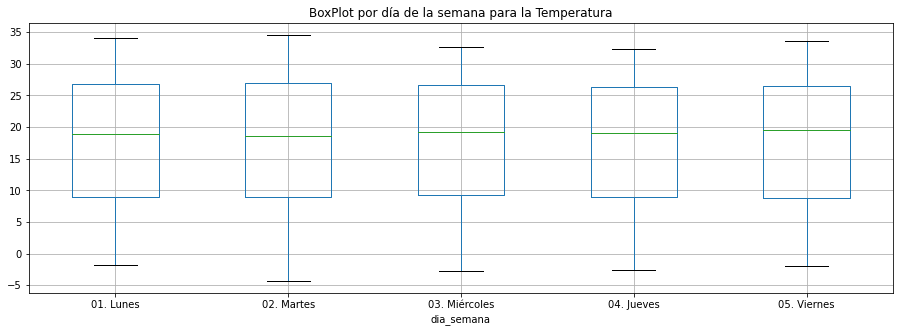

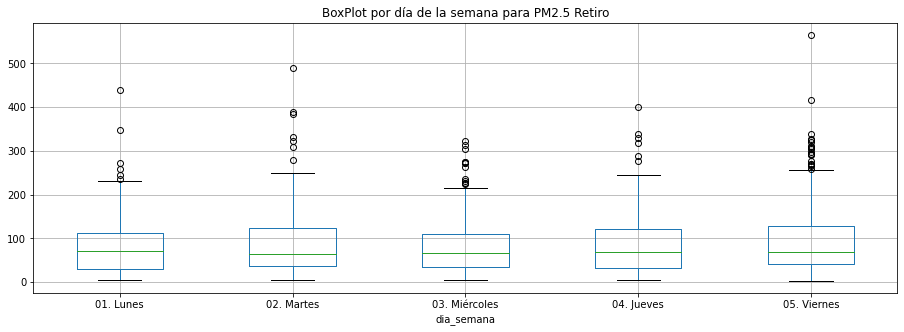

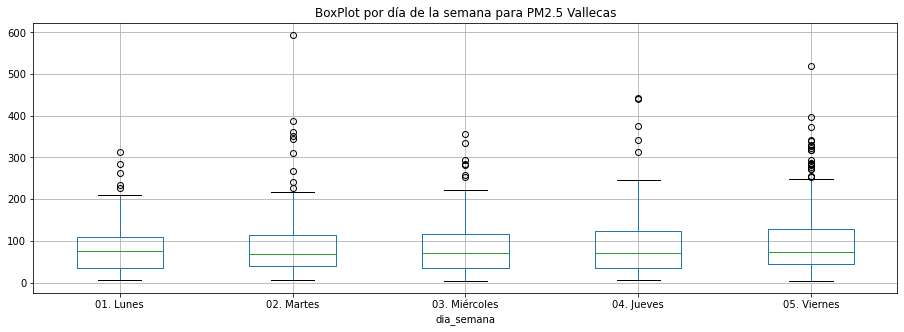

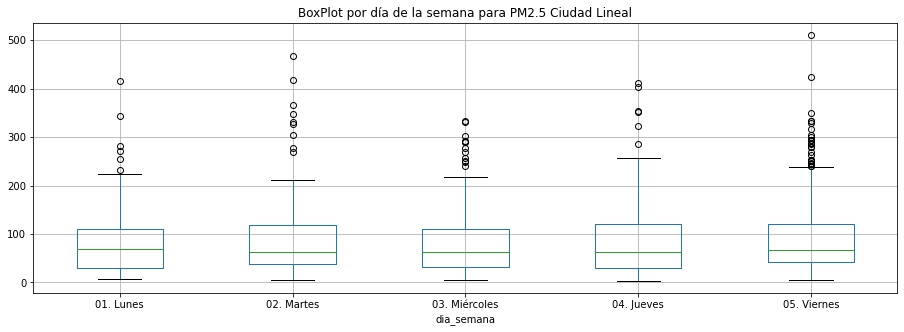

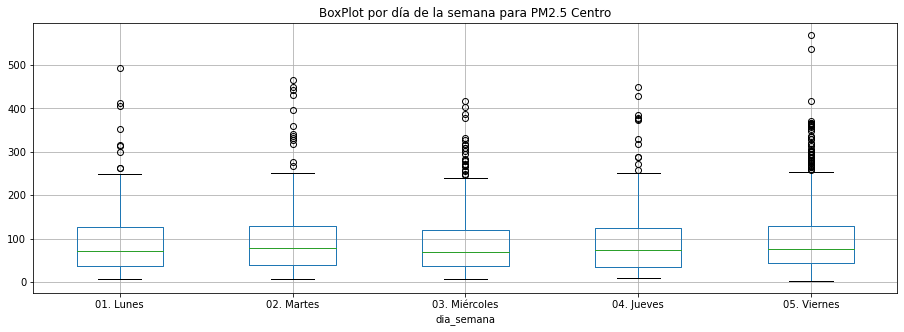

In [15]:
df_agr['dia_semana'] = np.select([df_agr.date.dt.dayofweek == 0
                                    ,df_agr.date.dt.dayofweek == 1
                                    ,df_agr.date.dt.dayofweek == 2
                                    ,df_agr.date.dt.dayofweek == 3],
                                    ['01. Lunes','02. Martes','03. Miércoles','04. Jueves'], default='05. Viernes')
df_agr.boxplot(by='dia_semana', column='TEMPERATURE',rot=0,figsize=(15,5))
pyplot.title("BoxPlot por día de la semana para la Temperatura")
pyplot.suptitle('')
pyplot.show()


df_agr['dia_semana'] = np.select([df_agr.date.dt.dayofweek == 0
                                    ,df_agr.date.dt.dayofweek == 1
                                    ,df_agr.date.dt.dayofweek == 2
                                    ,df_agr.date.dt.dayofweek == 3],
                                    ['01. Lunes','02. Martes','03. Miércoles','04. Jueves'], default='05. Viernes')
df_agr.boxplot(by='dia_semana', column='PM_RETIRO',rot=0,figsize=(15,5))
pyplot.title("BoxPlot por día de la semana para PM2.5 Retiro")
pyplot.suptitle('')
pyplot.show()


df_agr['dia_semana'] = np.select([df_agr.date.dt.dayofweek == 0
                                    ,df_agr.date.dt.dayofweek == 1
                                    ,df_agr.date.dt.dayofweek == 2
                                    ,df_agr.date.dt.dayofweek == 3],
                                    ['01. Lunes','02. Martes','03. Miércoles','04. Jueves'], default='05. Viernes')
df_agr.boxplot(by='dia_semana', column='PM_VALLECAS',rot=0,figsize=(15,5))
pyplot.title("BoxPlot por día de la semana para PM2.5 Vallecas")
pyplot.suptitle('')
pyplot.show()


df_agr['dia_semana'] = np.select([df_agr.date.dt.dayofweek == 0
                                    ,df_agr.date.dt.dayofweek == 1
                                    ,df_agr.date.dt.dayofweek == 2
                                    ,df_agr.date.dt.dayofweek == 3],
                                    ['01. Lunes','02. Martes','03. Miércoles','04. Jueves'], default='05. Viernes')
df_agr.boxplot(by='dia_semana', column='PM_CIUDADLINEAL',rot=0,figsize=(15,5))
pyplot.title("BoxPlot por día de la semana para PM2.5 Ciudad Lineal")
pyplot.suptitle('')
pyplot.show()


df_agr['dia_semana'] = np.select([df_agr.date.dt.dayofweek == 0
                                    ,df_agr.date.dt.dayofweek == 1
                                    ,df_agr.date.dt.dayofweek == 2
                                    ,df_agr.date.dt.dayofweek == 3],
                                    ['01. Lunes','02. Martes','03. Miércoles','04. Jueves'], default='05. Viernes')
df_agr.boxplot(by='dia_semana', column='PM_CENTRO',rot=0,figsize=(15,5))
pyplot.title("BoxPlot por día de la semana para PM2.5 Centro")
pyplot.suptitle('')
pyplot.show()

#### ____

### Descomposición de las series temporales

A continuación se observa la serie de media mensual y las series +- 2 desviaciones, para observar cuando aumenta la volatilidad histórica.

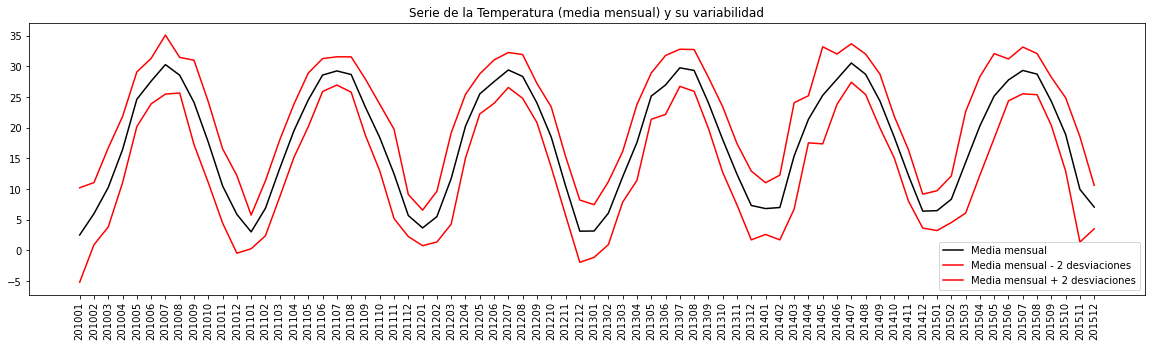

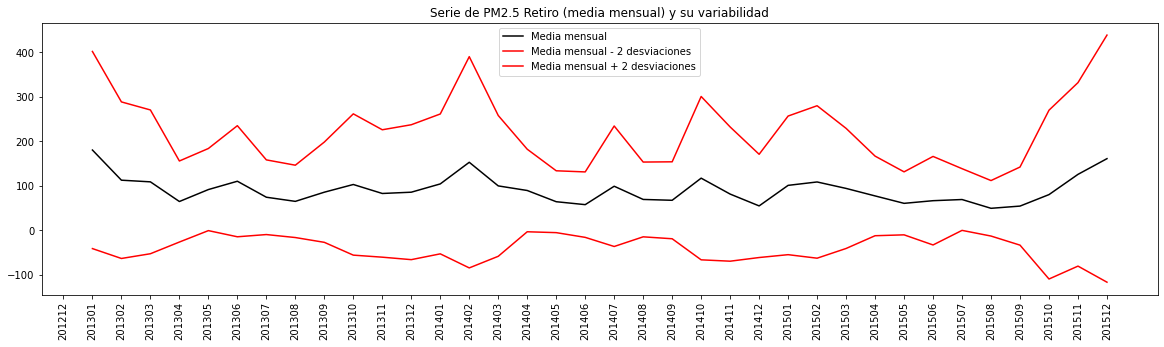

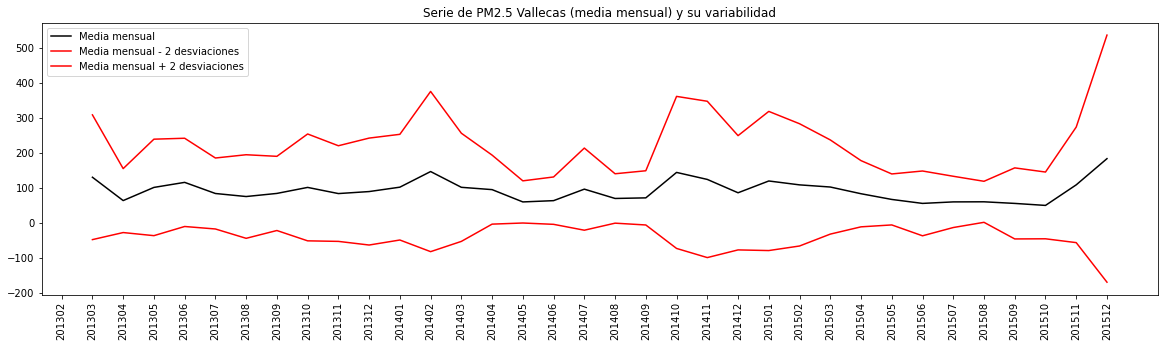

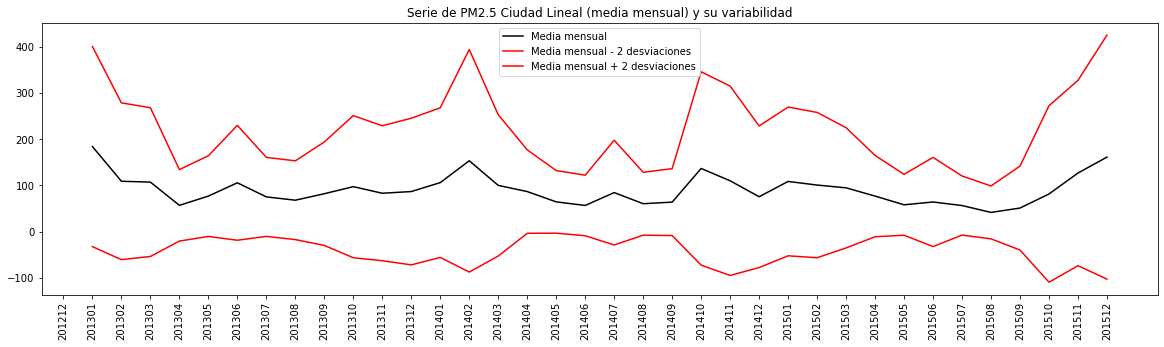

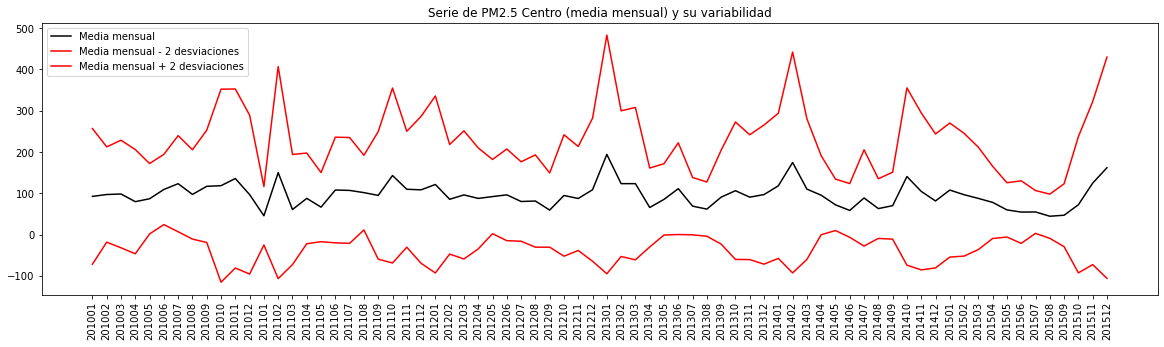

In [16]:
aux=pd.DataFrame(df_agr.groupby(['anyomes'], as_index=False).agg({'TEMPERATURE':['mean','std']}))
aux.columns = ['anyomes','mean','std']
aux['-2std']=aux['mean'] - 2 * aux['std']
aux['+2std']=aux['mean'] + 2 * aux['std']
pyplot.figure(figsize=(20,5))
pyplot.title("Serie de la Temperatura (media mensual) y su variabilidad")
pyplot.plot('anyomes', 'mean', data=aux, marker='', color='black' , label='Media mensual')
pyplot.plot('-2std', data=aux, marker='', color='red', label='Media mensual - 2 desviaciones')
pyplot.plot('+2std', data=aux, marker='', color='red',label='Media mensual + 2 desviaciones')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()



aux=pd.DataFrame(df_agr.groupby(['anyomes'], as_index=False).agg({'PM_RETIRO':['mean','std']}))
aux.columns = ['anyomes','mean','std']
aux['-2std']=aux['mean'] - 2 * aux['std']
aux['+2std']=aux['mean'] + 2 * aux['std']
pyplot.figure(figsize=(20,5))
pyplot.title("Serie de PM2.5 Retiro (media mensual) y su variabilidad")
pyplot.plot('anyomes', 'mean', data=aux, marker='', color='black' , label='Media mensual')
pyplot.plot('-2std', data=aux, marker='', color='red', label='Media mensual - 2 desviaciones')
pyplot.plot('+2std', data=aux, marker='', color='red',label='Media mensual + 2 desviaciones')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()



aux=pd.DataFrame(df_agr.groupby(['anyomes'], as_index=False).agg({'PM_VALLECAS':['mean','std']}))
aux.columns = ['anyomes','mean','std']
aux['-2std']=aux['mean'] - 2 * aux['std']
aux['+2std']=aux['mean'] + 2 * aux['std']
pyplot.figure(figsize=(20,5))
pyplot.title("Serie de PM2.5 Vallecas (media mensual) y su variabilidad")
pyplot.plot('anyomes', 'mean', data=aux, marker='', color='black' , label='Media mensual')
pyplot.plot('-2std', data=aux, marker='', color='red', label='Media mensual - 2 desviaciones')
pyplot.plot('+2std', data=aux, marker='', color='red',label='Media mensual + 2 desviaciones')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()



aux=pd.DataFrame(df_agr.groupby(['anyomes'], as_index=False).agg({'PM_CIUDADLINEAL':['mean','std']}))
aux.columns = ['anyomes','mean','std']
aux['-2std']=aux['mean'] - 2 * aux['std']
aux['+2std']=aux['mean'] + 2 * aux['std']
pyplot.figure(figsize=(20,5))
pyplot.title("Serie de PM2.5 Ciudad Lineal (media mensual) y su variabilidad")
pyplot.plot('anyomes', 'mean', data=aux, marker='', color='black' , label='Media mensual')
pyplot.plot('-2std', data=aux, marker='', color='red', label='Media mensual - 2 desviaciones')
pyplot.plot('+2std', data=aux, marker='', color='red',label='Media mensual + 2 desviaciones')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()



aux=pd.DataFrame(df_agr.groupby(['anyomes'], as_index=False).agg({'PM_CENTRO':['mean','std']}))
aux.columns = ['anyomes','mean','std']
aux['-2std']=aux['mean'] - 2 * aux['std']
aux['+2std']=aux['mean'] + 2 * aux['std']
pyplot.figure(figsize=(20,5))
pyplot.title("Serie de PM2.5 Centro (media mensual) y su variabilidad")
pyplot.plot('anyomes', 'mean', data=aux, marker='', color='black' , label='Media mensual')
pyplot.plot('-2std', data=aux, marker='', color='red', label='Media mensual - 2 desviaciones')
pyplot.plot('+2std', data=aux, marker='', color='red',label='Media mensual + 2 desviaciones')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()

#### ____

<ipython-input-17-0f19a861826a>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion_aditiva = seasonal_decompose(df_agr.TEMPERATURE,model='additive',freq=120)


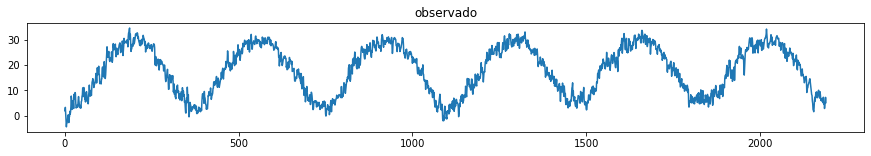

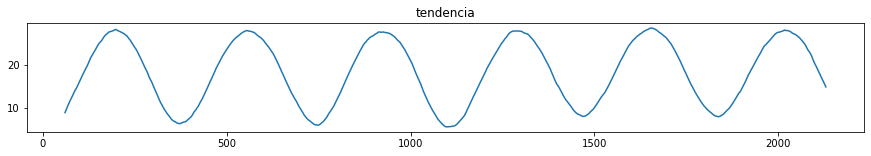

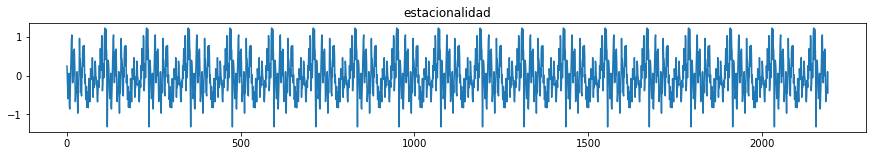

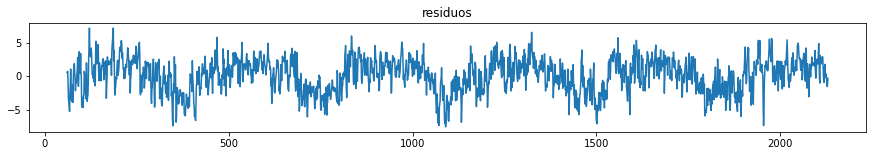

In [17]:

'''TEMPERATURE'''

descomposicion_aditiva = seasonal_decompose(df_agr.TEMPERATURE,model='additive',freq=120)
descomposicion_aditiva.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_aditiva.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_aditiva.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_aditiva.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_RETIRO'''

descomposicion_aditiva = seasonal_decompose(df_agr.PM_RETIRO,model='additive',period=120)
descomposicion_aditiva.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_aditiva.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_aditiva.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_aditiva.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_VALLECAS'''

descomposicion_aditiva = seasonal_decompose(df_agr.PM_VALLECAS,model='additive',freq=120)
descomposicion_aditiva.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_aditiva.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_aditiva.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_aditiva.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_CIUDADLINEAL'''

descomposicion_aditiva = seasonal_decompose(df_agr.PM_CIUDADLINEAL,model='additive',freq=120)
descomposicion_aditiva.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_aditiva.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_aditiva.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_aditiva.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_CENTRO'''

descomposicion_aditiva = seasonal_decompose(df_agr.PM_CENTRO,model='additive',freq=120)
descomposicion_aditiva.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_aditiva.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_aditiva.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_aditiva.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

#### ____

<ipython-input-18-c6c7ec240127>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['TEMPERATURE']+50),model='multiplicative',freq=120)


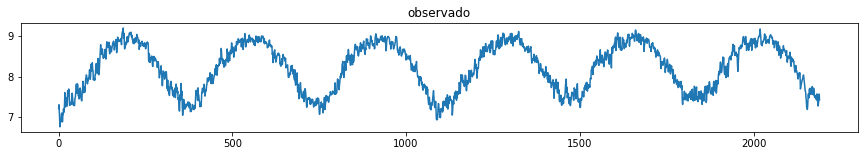

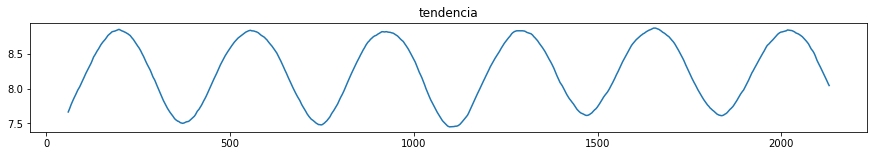

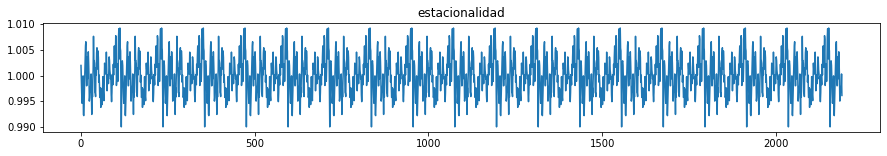

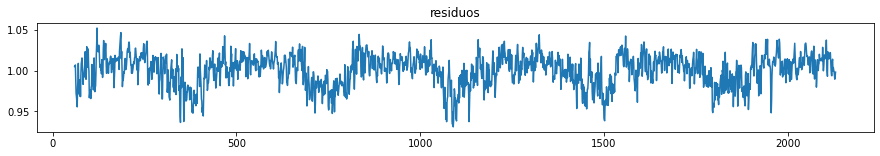

In [18]:

'''TEMPERATURE'''

descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['TEMPERATURE']+50),model='multiplicative',freq=120)
descomposicion_multiplicativa.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_multiplicativa.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_multiplicativa.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_multiplicativa.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_RETIRO'''

descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['PM_RETIRO']+50),model='multiplicative',freq=120)
descomposicion_multiplicativa.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_multiplicativa.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_multiplicativa.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_multiplicativa.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_VALLECAS'''

descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['PM_VALLECAS']+50),model='multiplicative',freq=120)
descomposicion_multiplicativa.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_multiplicativa.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_multiplicativa.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_multiplicativa.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_CIUDADLINEAL'''

descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['PM_CIUDADLINEAL']+50),model='multiplicative',freq=120)
descomposicion_multiplicativa.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_multiplicativa.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_multiplicativa.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_multiplicativa.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

In [ ]:

'''PM_CENTRO'''

descomposicion_multiplicativa = seasonal_decompose(np.sqrt(df_agr['PM_CENTRO']+50),model='multiplicative',freq=120)
descomposicion_multiplicativa.observed.plot(figsize=(15,2),title='observado')
pyplot.show()
descomposicion_multiplicativa.trend.plot(figsize=(15,2),title='tendencia')
pyplot.show()
descomposicion_multiplicativa.seasonal.plot(figsize=(15,2),title='estacionalidad')
pyplot.show()
descomposicion_multiplicativa.resid.plot(figsize=(15,2),title='residuos')
pyplot.show()

#### ____

Periodograma

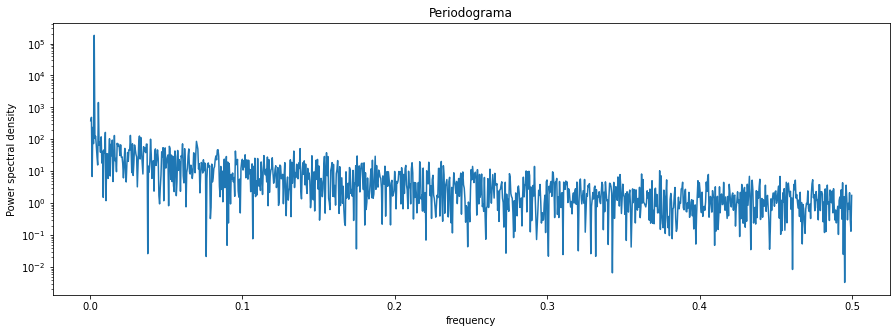

In [19]:

'''TEMPERATURE'''

f, Pxx_den = signal.periodogram(df_agr['TEMPERATURE'])
pyplot.figure(figsize=(15,5))
pyplot.semilogy(f[1:10000000], Pxx_den[1:10000000])
pyplot.title('Periodograma')
pyplot.xlabel('frequency')
pyplot.ylabel('Power spectral density')
pyplot.show()

In [ ]:

'''PM_RETIRO'''

f, Pxx_den = signal.periodogram(df_agr['PM_RETIRO'])
pyplot.figure(figsize=(15,5))
pyplot.semilogy(f[1:10000000], Pxx_den[1:10000000])
pyplot.title('Periodograma')
pyplot.xlabel('frequency')
pyplot.ylabel('Power spectral density')
pyplot.show()

In [ ]:

'''PM_VALLECAS'''

f, Pxx_den = signal.periodogram(df_agr['PM_VALLECAS'])
pyplot.figure(figsize=(15,5))
pyplot.semilogy(f[1:10000000], Pxx_den[1:10000000])
pyplot.title('Periodograma')
pyplot.xlabel('frequency')
pyplot.ylabel('Power spectral density')
pyplot.show()

In [ ]:

'''PM_CIUDADLINEAL'''

f, Pxx_den = signal.periodogram(df_agr['PM_CIUDADLINEAL'])
pyplot.figure(figsize=(15,5))
pyplot.semilogy(f[1:10000000], Pxx_den[1:10000000])
pyplot.title('Periodograma')
pyplot.xlabel('frequency')
pyplot.ylabel('Power spectral density')
pyplot.show()

In [ ]:

'''PM_CENTRO'''

f, Pxx_den = signal.periodogram(df_agr['PM_CENTRO'])
pyplot.figure(figsize=(15,5))
pyplot.semilogy(f[1:10000000], Pxx_den[1:10000000])
pyplot.title('Periodograma')
pyplot.xlabel('frequency')
pyplot.ylabel('Power spectral density')
pyplot.show()

#### ____

#### ____